# Library Imports

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

# Dataset Import

In [4]:
# dataset = pd.read_csv(os.path.join("D:", "Dataset", "label.csv"))
dataset = pd.read_csv(os.path.join("C:", "Users", "paris", "Desktop", "label_CMU-MOSI.csv"))
dataset_df = pd.DataFrame(dataset)
display(dataset_df)

,video_id,clip_id,text,label,label_T,label_A,label_V,annotation,mode
0,03bSnISJMiM,11,A LOT OF SAD PARTS,-0.5,NaN,NaN,NaN,Neutral,train
1,03bSnISJMiM,10,THERE IS SAD PART,-1.2,NaN,NaN,NaN,Negative,train
2,03bSnISJMiM,13,AND ITS A REALLY FUNNY,1.8,NaN,NaN,NaN,Positive,train
3,03bSnISJMiM,12,BUT IT WAS REALLY REALLY AWESOME,2.2,NaN,NaN,NaN,Positive,train
4,03bSnISJMiM,1,ANYHOW IT WAS REALLY GOOD,2.4,NaN,NaN,NaN,Positive,train
...,...,...,...,...,...,...,...,...,...
2194,zhpQhgha_KU,30,BECAUSE THERE REALLY WASNT ALL THAT MUCH TO IT...,-2.0,NaN,NaN,NaN,Negative,test
2195,zhpQhgha_KU,35,UM SO IF YOU LIKE TO HEAR A UM LIKE MORE POSIT...,0.6,NaN,NaN,NaN,Positive,test
2196,zhpQhgha_KU,34,AND SHE REALLY ENJOYED THE FILM,1.2,NaN,NaN,NaN,Positive,test
2197,zhpQhgha_KU,33,IF YOU DO WANNA SEE SOMEBODY WHOS POSSIBLY CRI...,-0.4,NaN,NaN,NaN,Negative,test


- `videoId` is a unique YouTube Video and
- it is splited into parts, each part is a `clipId`
    - Key/Unique Combination: `{videoId}, {clipId}`

The dataset doesn't seem to provide us with the labels for each modality. So we drop the columns that are not useful for our analysis.

In [5]:
dataset_df = dataset_df.drop(columns=['label_T', 'label_A', 'label_V'])

display(dataset_df)

,video_id,clip_id,text,label,annotation,mode
0,03bSnISJMiM,11,A LOT OF SAD PARTS,-0.5,Neutral,train
1,03bSnISJMiM,10,THERE IS SAD PART,-1.2,Negative,train
2,03bSnISJMiM,13,AND ITS A REALLY FUNNY,1.8,Positive,train
3,03bSnISJMiM,12,BUT IT WAS REALLY REALLY AWESOME,2.2,Positive,train
4,03bSnISJMiM,1,ANYHOW IT WAS REALLY GOOD,2.4,Positive,train
...,...,...,...,...,...,...
2194,zhpQhgha_KU,30,BECAUSE THERE REALLY WASNT ALL THAT MUCH TO IT...,-2.0,Negative,test
2195,zhpQhgha_KU,35,UM SO IF YOU LIKE TO HEAR A UM LIKE MORE POSIT...,0.6,Positive,test
2196,zhpQhgha_KU,34,AND SHE REALLY ENJOYED THE FILM,1.2,Positive,test
2197,zhpQhgha_KU,33,IF YOU DO WANNA SEE SOMEBODY WHOS POSSIBLY CRI...,-0.4,Negative,test


In [6]:
dataset_df = dataset_df.drop(columns=['annotation'])

display(dataset_df)

,video_id,clip_id,text,label,mode
0,03bSnISJMiM,11,A LOT OF SAD PARTS,-0.5,train
1,03bSnISJMiM,10,THERE IS SAD PART,-1.2,train
2,03bSnISJMiM,13,AND ITS A REALLY FUNNY,1.8,train
3,03bSnISJMiM,12,BUT IT WAS REALLY REALLY AWESOME,2.2,train
4,03bSnISJMiM,1,ANYHOW IT WAS REALLY GOOD,2.4,train
...,...,...,...,...,...
2194,zhpQhgha_KU,30,BECAUSE THERE REALLY WASNT ALL THAT MUCH TO IT...,-2.0,test
2195,zhpQhgha_KU,35,UM SO IF YOU LIKE TO HEAR A UM LIKE MORE POSIT...,0.6,test
2196,zhpQhgha_KU,34,AND SHE REALLY ENJOYED THE FILM,1.2,test
2197,zhpQhgha_KU,33,IF YOU DO WANNA SEE SOMEBODY WHOS POSSIBLY CRI...,-0.4,test


Create a new column (`annotation_label`) that contains the numeric value of the label for BINARY CLASSIFICATION
- Negative: [-3, 0)
- Positive: [0, 3]

Here we assume that the label 0 is positive.
(Other approaches sometimes just reject the label 0, but we will keep it for now)

In [7]:
# Applying the map to create the new column
dataset_df['annotation_label'] = dataset_df['label'].apply(lambda x: 0 if x < 0 else 1)

display(dataset_df)

,video_id,clip_id,text,label,mode,annotation_label
0,03bSnISJMiM,11,A LOT OF SAD PARTS,-0.5,train,0
1,03bSnISJMiM,10,THERE IS SAD PART,-1.2,train,0
2,03bSnISJMiM,13,AND ITS A REALLY FUNNY,1.8,train,1
3,03bSnISJMiM,12,BUT IT WAS REALLY REALLY AWESOME,2.2,train,1
4,03bSnISJMiM,1,ANYHOW IT WAS REALLY GOOD,2.4,train,1
...,...,...,...,...,...,...
2194,zhpQhgha_KU,30,BECAUSE THERE REALLY WASNT ALL THAT MUCH TO IT...,-2.0,test,0
2195,zhpQhgha_KU,35,UM SO IF YOU LIKE TO HEAR A UM LIKE MORE POSIT...,0.6,test,1
2196,zhpQhgha_KU,34,AND SHE REALLY ENJOYED THE FILM,1.2,test,1
2197,zhpQhgha_KU,33,IF YOU DO WANNA SEE SOMEBODY WHOS POSSIBLY CRI...,-0.4,test,0


# Check Dataset Balance

We need the dataset to be balanced in order to avoid bias in our model.
If the dataset has a lot more samples of one class, the model will be biased towards that class and it might tend to predict more samples of that class, only because it has seen more samples of that class.

Imbalance is not defined formally but a ratio of 1 to 10 is usually imbalanced enough to benefit from using balancing technique (Rule of thumb), since we also have a small dataset so we "lose by a lot" if we decide to balance. So we need to be careful.

In [8]:
frequency = dataset_df['mode'].value_counts()            # Frequency counts
percentages = dataset_df['mode'].value_counts(normalize=True) * 100  # Percentages

# Combining both into a single DataFrame for better readability
result = pd.DataFrame({'Frequency': frequency, 'Percentage': percentages})

print(result)

       Frequency  Percentage
mode                        
train       1284   58.390177
test         686   31.195998
valid        229   10.413824


## Dataset split

In [9]:
frequency = dataset_df['mode'].value_counts()

print(frequency)

mode
train    1284
test      686
valid     229
Name: count, dtype: int64


In [12]:
y = dataset_df["annotation_label"].to_numpy()

In [11]:
# This function is used to plot the label frequencies of a dataset
# INPUTS:
# y:    numpy array of labels
def plot_dataset_labels(y):
    fig, ax = plt.subplots(figsize=(9, 5), layout="constrained")

    # Dataset's labels' bar chart
    y_unique, y_unique_counts = np.unique(y, return_counts=True)
    print(y_unique, y_unique_counts)
    ax.bar(y_unique, y_unique_counts,
              align='center',
              color=['darkslateblue', 'teal', 'yellow', 'coral', 'lawngreen'],
              edgecolor = 'k',
              alpha=0.6)
    ax.set_xlabel('Label')
    ax.set_ylabel('Frequency')
    ax.set_xticks(y_unique)

[0 1] [1023 1176]


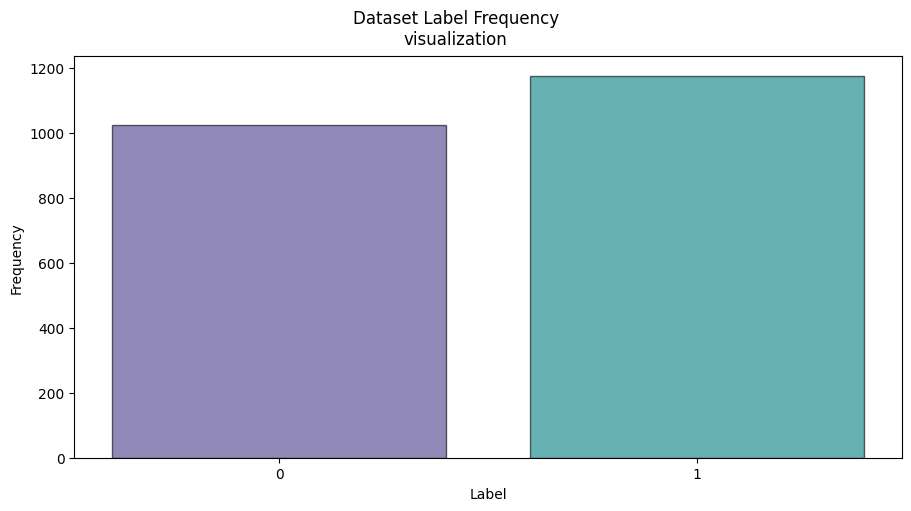

In [13]:
plot_dataset_labels(y)
plt.suptitle('Dataset Label Frequency\nvisualization')
plt.show()

In [14]:
train_labels = dataset_df[dataset_df['mode'] == 'train']['annotation_label']

val_labels = dataset_df[dataset_df['mode'] == 'valid']['annotation_label']

test_labels = dataset_df[dataset_df['mode'] == 'test']['annotation_label']

[0 1] [552 732]


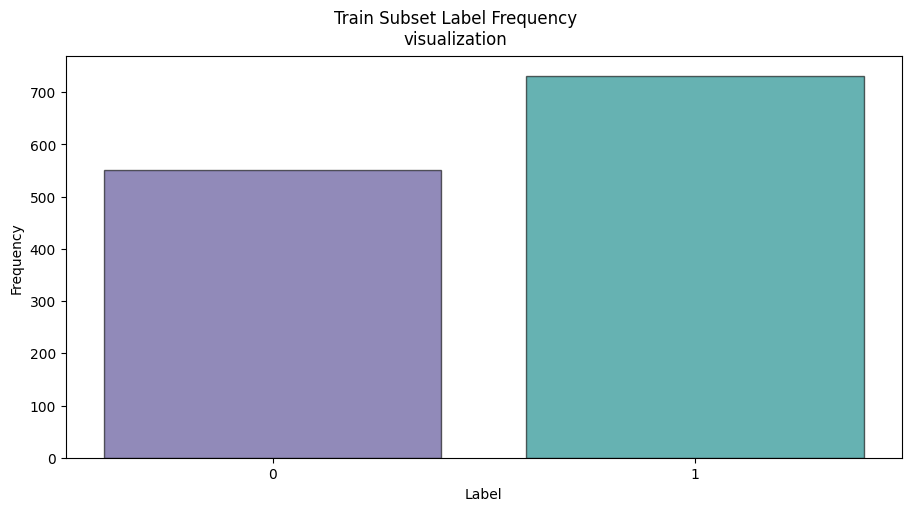

In [15]:
plot_dataset_labels(train_labels.to_numpy())
plt.suptitle('Train Subset Label Frequency\nvisualization')
plt.show()

[0 1] [ 92 137]


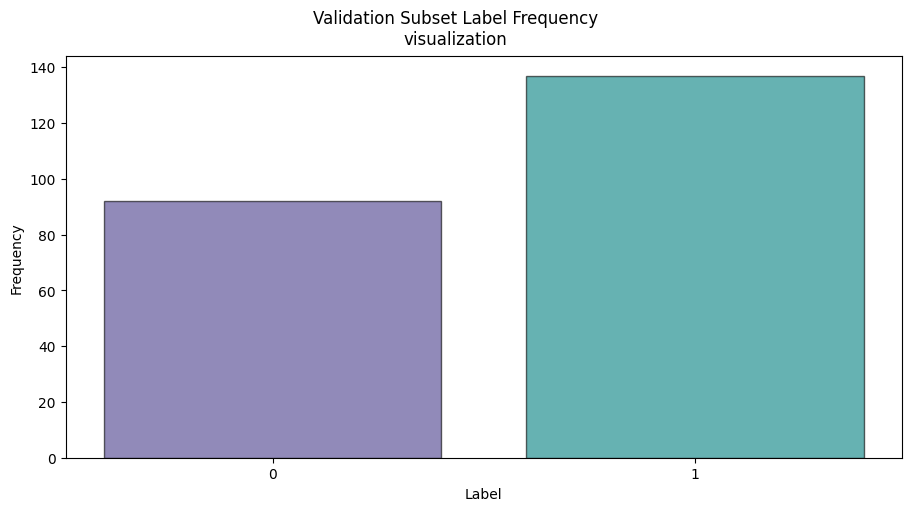

In [16]:
plot_dataset_labels(val_labels.to_numpy())
plt.suptitle('Validation Subset Label Frequency\nvisualization')
plt.show()

[0 1] [379 307]


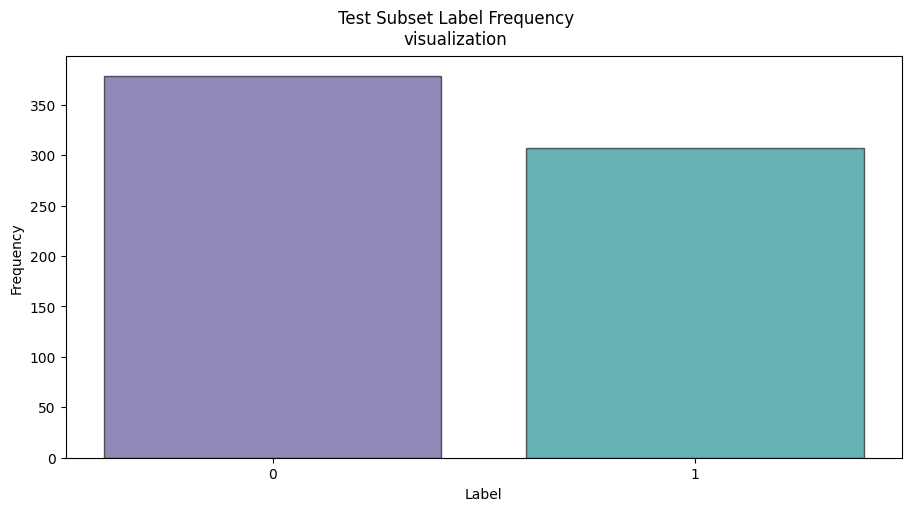

In [17]:
plot_dataset_labels(test_labels.to_numpy())
plt.suptitle('Test Subset Label Frequency\nvisualization')
plt.show()

## Distributions

### Labels / Polarity

In [ ]:
# This function is used to plot the distribution of a dataset's labels
# Creates a histogram and a distribution line above it
# INPUTS:
# dataset_df_column:    pandas series of the dataset's labels
def plot_labels_distr(dataset_df_column):
    q25, q75 = np.percentile(dataset_df_column, [25, 75])
    bin_width = 2 * (q75 - q25) * len(dataset_df_column) ** (-1/5)
    bins = round((dataset_df_column.max() - dataset_df_column.min()) / bin_width)

    # Plotting the histogram and distribution line
    plt.figure(figsize=(10, 6))
    sns.histplot(dataset_df_column,
                 bins=bins,
                 kde=True, color='blue', alpha=0.3)
    plt.title(f'Distribution of {dataset_df_column.name}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)

    # Show the plot
    plt.show()

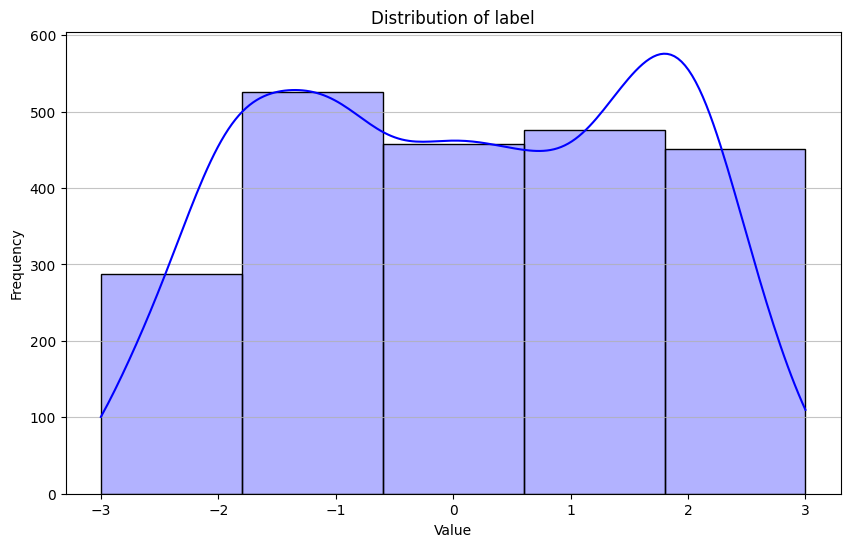

In [ ]:
plot_labels_distr(dataset_df['label'])

In [ ]:
# This function is used to plot the distribution of the lengths of strings in a dataset
# INPUTS:
# dataset_df_column:    pandas series of the dataset's strings
def plot_sentence_length_distribution(dataset_df_column):
    # Calculate the length of each string in the Series
    lengths = dataset_df_column.str.len()

    # Calculate optimal number of bins using the Freedman-Diaconis rule
    q25, q75 = np.percentile(lengths, [25, 75])
    bin_width = 2 * (q75 - q25) * len(lengths) ** (-1/7)
    bins = round((lengths.max() - lengths.min()) / bin_width)

    # Plotting the histogram
    plt.figure(figsize=(10, 6))
    sns.histplot(lengths, bins=bins, kde=True, color='blue', alpha=0.3)
    plt.title(f'Distribution of Lengths of Strings in {dataset_df_column.name}')
    plt.xlabel('Length of Strings')
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)

    # Show the plot
    plt.show()

### Length of Text / Word Count

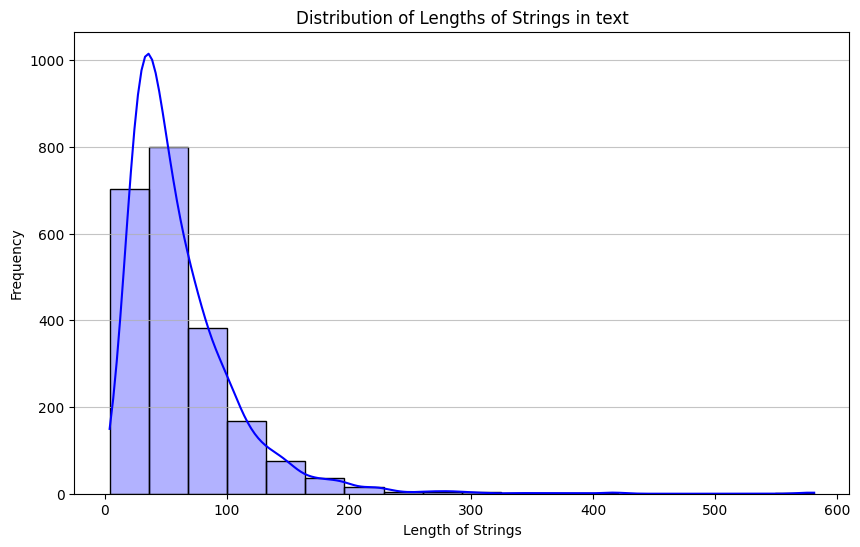

In [ ]:
plot_sentence_length_distribution(dataset_df['text'])

In [ ]:
# This function is used to plot the distribution of the word counts of strings in a dataset
# INPUTS:
# dataset_df_column:    pandas series of the dataset's strings
def plot_word_count_distribution(dataset_df_column):
    # Calculate the word count of each string in the Series
    word_counts = dataset_df_column.apply(lambda x: len(x.split()))

    # Calculate optimal number of bins using the Freedman-Diaconis rule
    q25, q75 = np.percentile(word_counts, [25, 75])
    bin_width = 2 * (q75 - q25) * len(word_counts) ** (-1/7)
    bins = round((word_counts.max() - word_counts.min()) / bin_width)

    # Plotting the histogram
    plt.figure(figsize=(10, 6))
    sns.histplot(word_counts, bins=bins, kde=True, color='blue', alpha=0.3)
    plt.title(f'Distribution of Word Counts in {dataset_df_column.name}')
    plt.xlabel('Word Count')
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)

    # Show the plot
    plt.show()

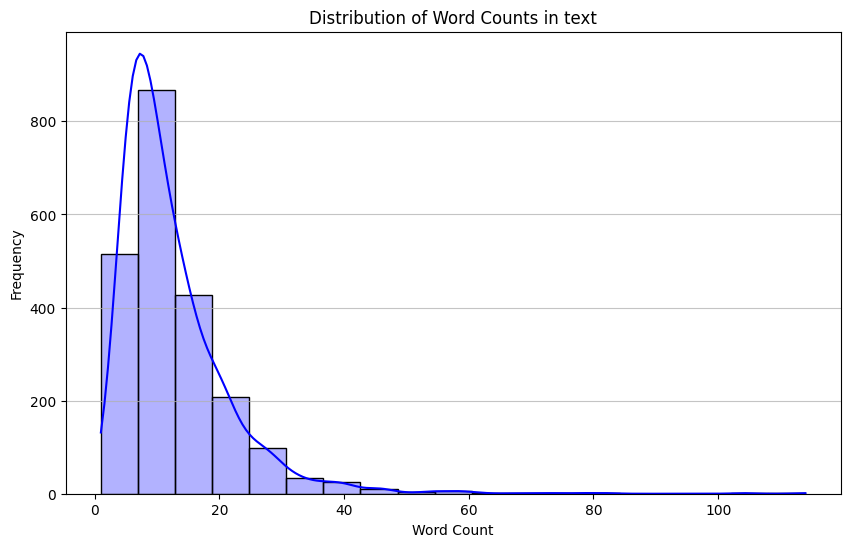

In [ ]:
plot_word_count_distribution(dataset_df['text'])

## N-grams

We extract N-Gram features. N-grams are used to describe the number of words used as observation points, e.g., unigram means singly-worded, bigram means 2-worded phrase, and trigram means 3-worded phrase.
- We compare N-grams before and after removing stop words.
    - Stopwords are words such as `and`, `the`, `is` etc.

### Unigrams

In [ ]:
# Function to plot the top N most frequent n-grams from text data
# Can optionally plot a second column where stopwords have been removed.
def plot_top_ngrams(df_column_with_stopwords, ngram_range=(1, 1), top_n=20, plot_without_stopwords=False, df_column_without_stopwords=None):
    # Initialize CountVectorizer
    vectorizer_with_stopwords = CountVectorizer(ngram_range=ngram_range)

    # Create figure based on whether we're plotting one or two columns
    fig, axs = plt.subplots(1 if not plot_without_stopwords else 2, 1, figsize=(8, 5 if not plot_without_stopwords else 10), sharey=False)

    # If plotting without stopwords is False, treat axs as a single axis
    if not plot_without_stopwords:
        axs = [axs]

    # Plot for the column with stopwords
    X_with_stopwords = vectorizer_with_stopwords.fit_transform(df_column_with_stopwords)
    ngram_counts_with_stopwords = np.asarray(X_with_stopwords.sum(axis=0)).flatten()
    ngram_features_with_stopwords = vectorizer_with_stopwords.get_feature_names_out()

    # Create a DataFrame for the n-grams and their counts
    ngram_df_with_stopwords = pd.DataFrame({'ngram': ngram_features_with_stopwords, 'count': ngram_counts_with_stopwords})

    # Get the top N n-grams
    top_ngrams_with_stopwords = ngram_df_with_stopwords.nlargest(top_n, 'count')

    # Plotting the histogram for the text with stopwords
    sns.barplot(x='count', y='ngram',
                data=top_ngrams_with_stopwords,
                palette='viridis', hue='ngram',
                dodge=False, legend=False,
                ax=axs[0])
    axs[0].set_xlabel('Count')
    axs[0].set_ylabel(f'{ngram_range[1]}-gram')
    axs[0].grid(axis='x', alpha=0.75)
    axs[0].set_title('(with stopwords)')

    # Optional: Plot for the column without stopwords
    if plot_without_stopwords and df_column_without_stopwords is not None:
        vectorizer_without_stopwords = CountVectorizer(ngram_range=ngram_range)
        X_without_stopwords = vectorizer_without_stopwords.fit_transform(df_column_without_stopwords)
        ngram_counts_without_stopwords = np.asarray(X_without_stopwords.sum(axis=0)).flatten()
        ngram_features_without_stopwords = vectorizer_without_stopwords.get_feature_names_out()

        # Create a DataFrame for the n-grams and their counts
        ngram_df_without_stopwords = pd.DataFrame({'ngram': ngram_features_without_stopwords, 'count': ngram_counts_without_stopwords})

        # Get the top N n-grams
        top_ngrams_without_stopwords = ngram_df_without_stopwords.nlargest(top_n, 'count')

        # Plotting the histogram for the text without stopwords
        sns.barplot(x='count', y='ngram',
                    data=top_ngrams_without_stopwords,
                    palette='viridis', hue='ngram',
                    dodge=False, legend=False,
                    ax=axs[1])
        axs[1].set_xlabel('Count')
        axs[1].set_ylabel(f'{ngram_range[1]}-gram')
        axs[1].grid(axis='x', alpha=0.75)
        axs[1].set_title('(without stopwords)')

    # Set main title
    plt.suptitle(f'Top {top_n} {ngram_range[1]}-grams in text columns')

    # Show the plot
    plt.show()


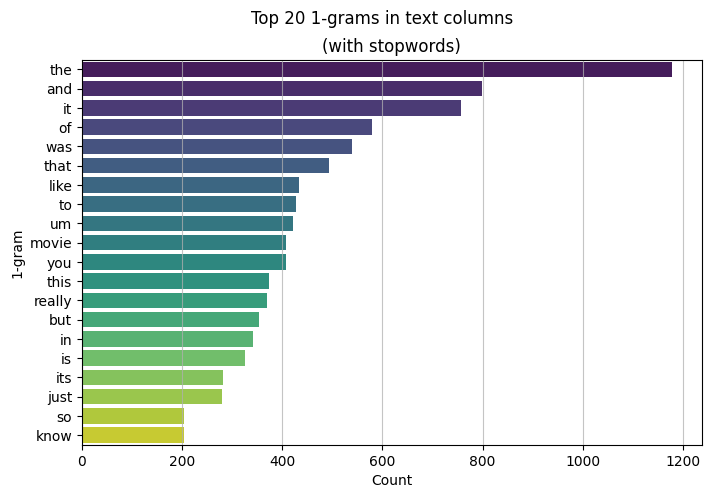

In [ ]:
# Plotting unigrams before and after removing stopwords
plot_top_ngrams(dataset_df['text'], ngram_range=(1,1), top_n=20)

### Bigrams

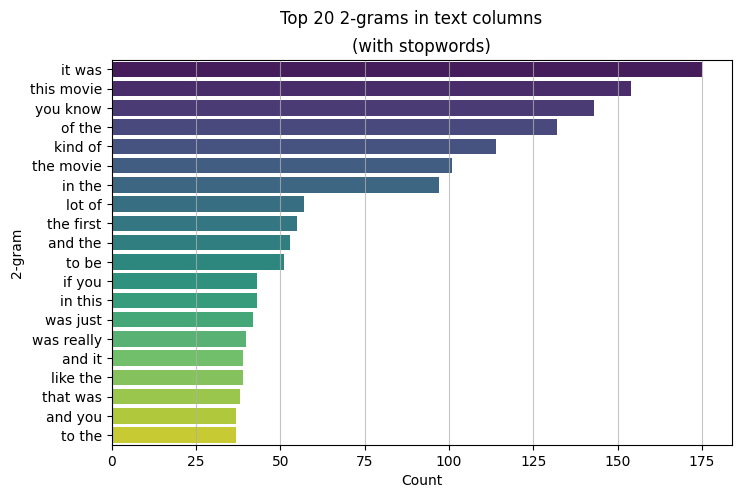

In [ ]:
# Plotting bigrams before and after removing stopwords
plot_top_ngrams(dataset_df['text'], ngram_range=(2,2), top_n=20)

### Trigrams

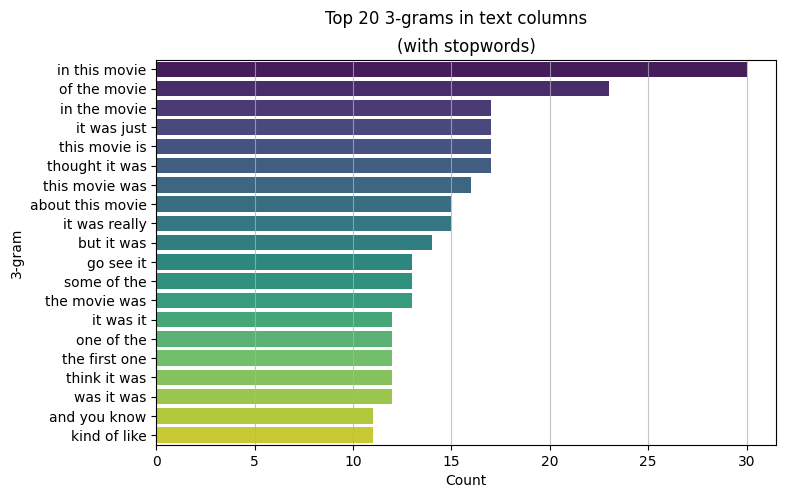

In [ ]:
# Plotting bigrams before and after removing stopwords
plot_top_ngrams(dataset_df['text'], ngram_range=(3,3), top_n=20)

---

## Text Preprocess

### Don't Remove stopwords

In [ ]:
# Import my preprocessing function
from textPreprocess import sentencePreprocess

from there it doe get a bit like not a real a what ha been going on


In [ ]:
# Apply the function to the 'text' column (new column to keep the og column as well)
dataset_df['processed_text'] = dataset_df['text'].apply(lambda x: sentencePreprocess(x, remove_stopwords=False))

In [ ]:
dataset_df = dataset_df.dropna()

In [ ]:
display(dataset_df[['text', 'processed_text']])

,text,processed_text
0,A LOT OF SAD PARTS,a lot of sad part
1,THERE IS SAD PART,there is sad part
2,AND ITS A REALLY FUNNY,and it a really funny
3,BUT IT WAS REALLY REALLY AWESOME,but it wa really really awesome
4,ANYHOW IT WAS REALLY GOOD,anyhow it wa really good
...,...,...
2194,BECAUSE THERE REALLY WASNT ALL THAT MUCH TO IT...,because there really wa not all that much to i...
2195,UM SO IF YOU LIKE TO HEAR A UM LIKE MORE POSIT...,so if you like to hear a like more positive re...
2196,AND SHE REALLY ENJOYED THE FILM,and she really enjoyed the film
2197,IF YOU DO WANNA SEE SOMEBODY WHOS POSSIBLY CRI...,if you do want to see somebody who is possibly...


For exploration purposes in order to find the appropriate functions needed to be applied to the text data, we export the data into an excel file for easier vizibility.

In [ ]:
dataset_df.to_excel(os.path.join("C:", "Users", "paris", "Desktop", "label_edited.xlsx"))
dataset_df.to_csv(os.path.join("C:", "Users", "paris", "Desktop", "label_edited.csv"),
                  sep='\t', encoding='utf-8', index=False, header=True)

### Remove stopwords

In [ ]:
# Apply the function to the 'text' column (new column to keep the og column as well)
dataset_df['processed_text'] = dataset_df['text'].apply(lambda x: sentencePreprocess(x, remove_stopwords=True))

In [ ]:
dataset_df = dataset_df.dropna()

In [ ]:
display(dataset_df[['text', 'processed_text']])

,text,processed_text
0,A LOT OF SAD PARTS,lot sad part
1,THERE IS SAD PART,sad part
2,AND ITS A REALLY FUNNY,really funny
3,BUT IT WAS REALLY REALLY AWESOME,really really awesome
4,ANYHOW IT WAS REALLY GOOD,anyhow really good
...,...,...
2194,BECAUSE THERE REALLY WASNT ALL THAT MUCH TO IT...,really wa not much
2195,UM SO IF YOU LIKE TO HEAR A UM LIKE MORE POSIT...,like hear like positive review check review good
2196,AND SHE REALLY ENJOYED THE FILM,really enjoyed film
2197,IF YOU DO WANNA SEE SOMEBODY WHOS POSSIBLY CRI...,want to see somebody who is possibly critiquing


In [ ]:
# dataset_df.to_excel(os.path.join("C:", "Users", "paris", "Desktop", "label_edited_no_stopwords.xlsx"))
# dataset_df.to_csv(os.path.join("C:", "Users", "paris", "Desktop", "label_edited_no_stopwords.csv"),
#                   sep='\t', encoding='utf-8', index=False, header=True)

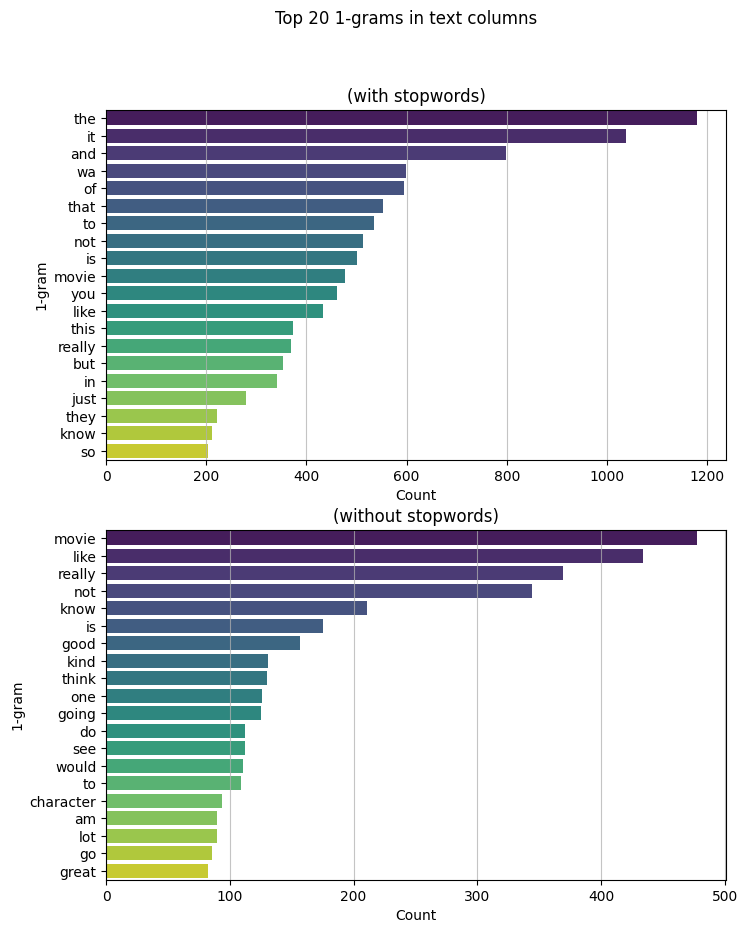

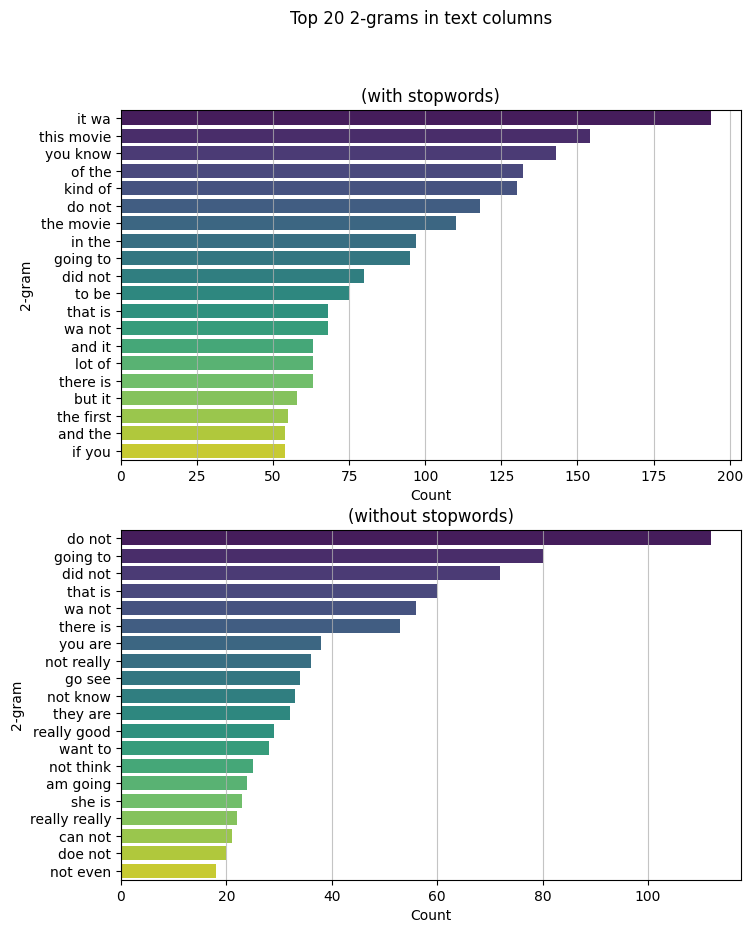

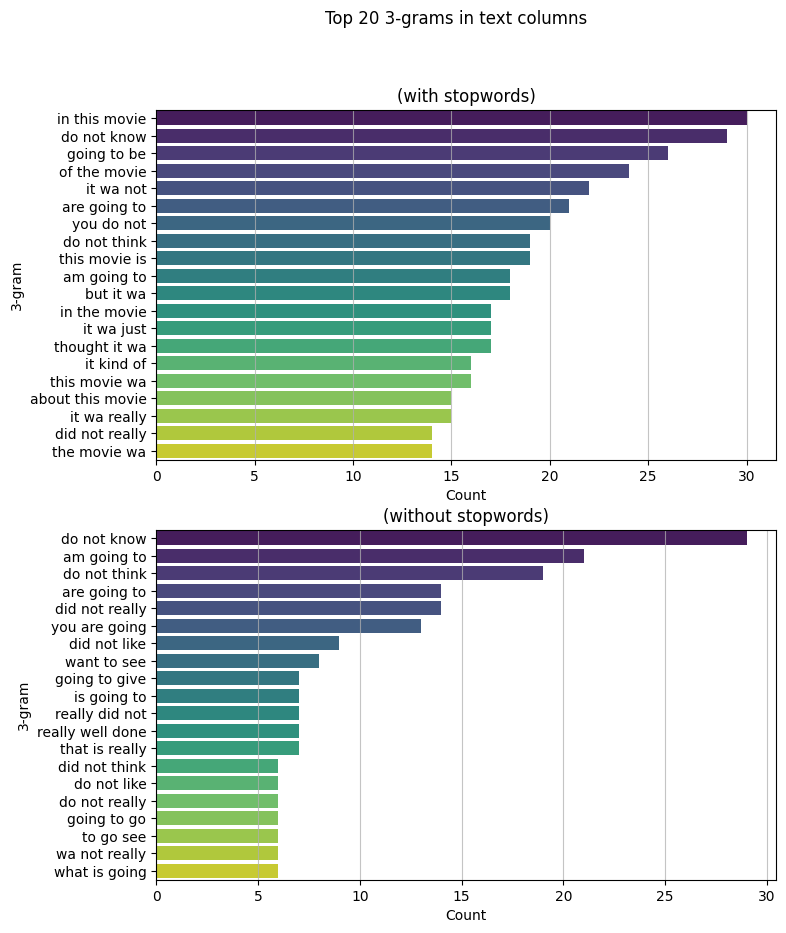

In [ ]:
# Plotting n-grams before and after removing stopwords
plot_top_ngrams(dataset_df['text'].apply(lambda x: sentencePreprocess(x, remove_stopwords=False)), ngram_range=(1,1), top_n=20,
                plot_without_stopwords=True, df_column_without_stopwords=dataset_df['text'].apply(lambda x: sentencePreprocess(x, remove_stopwords=True)))

plot_top_ngrams(dataset_df['text'].apply(lambda x: sentencePreprocess(x, remove_stopwords=False)), ngram_range=(2,2), top_n=20,
                plot_without_stopwords=True, df_column_without_stopwords=dataset_df['text'].apply(lambda x: sentencePreprocess(x, remove_stopwords=True)))

plot_top_ngrams(dataset_df['text'].apply(lambda x: sentencePreprocess(x, remove_stopwords=False)), ngram_range=(3,3), top_n=20,
                plot_without_stopwords=True, df_column_without_stopwords=dataset_df['text'].apply(lambda x: sentencePreprocess(x, remove_stopwords=True)))